1. 대전시 cctv 현황 분석
2. 대전시 범죄 발생 분석에 따른 안전한 지역확인 분석
3. 개인별 분석과제 제출 
4. 개인별 발표 

In [139]:
import folium
import pandas as pd
import numpy as np

#csv 파일 읽기
df_criminal = pd.read_csv('대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2017).csv',encoding='CP949')
df_daedok = pd.read_csv('대전광역시_대덕구_CCTV_20190331.csv',encoding='CP949')
df_donggu = pd.read_csv('대전광역시_동구_CCTV_20190321.csv',encoding='CP949')
df_seogu = pd.read_csv('대전광역시_서구_CCTV_20190705.csv',encoding='CP949')
df_useong = pd.read_csv('대전광역시_유성구_CCTV_20190520.csv',encoding='CP949')
df_junggu = pd.read_csv('대전광역시_중구_CCTV_20190527.csv',encoding='CP949')

# 구별 생활방범 CCTV 수

In [172]:
#대덕구 
df_daedok
df_daedok['설치목적구분']
df_daedok = df_daedok[df_daedok['설치목적구분'].str.contains('생활방범')]
daedok= df_daedok.describe()
print(type(daedok))
#동구
df_donggu
df_donggu['설치목적구분']
df_donggu = df_donggu[df_donggu['설치목적구분'].str.contains('생활방범')]
donggu=df_donggu.describe()
# print(donggu)

#서구
df_seogu
df_seogu['설치목적구분']
df_seogu = df_seogu[df_seogu['설치목적구분'].str.contains('생활방범')]
seogu= df_seogu.describe()
# print(seogu)

#유성구
df_useong
df_useong['설치목적구분']
df_useong = df_useong[df_useong['설치목적구분'].str.contains('생활방범')]
useong= df_useong.describe()
# print(useong)

# 중구
df_junggu
df_junggu['설치목적구분']
df_junggu = df_junggu[df_junggu['설치목적구분'].str.contains('생활방범')]
junggu= df_junggu.describe()
# print(junggu)

# print(daedok)
# new_daedok = daedok.loc['count','카메라대수']
# print(new_daedok)
# new_seogu = seogu.loc['count','카메라대수']
# new_useong = useong.loc['count','카메라대수']
# new_junggu= junggu.loc['count','카메라대수']


new_totoal = daedok.append(donggu, ignore_index =True)
new_totoal1 = new_totoal.append(seogu, ignore_index =True)
new_totoal1 = new_totoal1.append(useong, ignore_index =True)
total = new_totoal1.append(junggu, ignore_index =True)
print(total)
# new_total = new_total1.append(new_seogu, ignore_index =True)
# new_total = new_total.append(new_useong, ignore_index =True)
# new_total = new_total.append(new_junggu, ignore_index =True)
# new_total

<class 'pandas.core.frame.DataFrame'>
            경도        보관일수  소재지도로명주소          위도  촬영방면정보       카메라대수  \
0   338.000000  338.000000       NaN  338.000000     NaN  338.000000   
1   127.427885   28.979290       NaN   36.390818     NaN    1.153846   
2     0.014188    4.743528       NaN    0.042043     NaN    0.361336   
3   127.378326    7.000000       NaN   36.328581     NaN    1.000000   
4   127.418913   30.000000       NaN   36.358080     NaN    1.000000   
5   127.425857   30.000000       NaN   36.365998     NaN    1.000000   
6   127.433963   30.000000       NaN   36.438652     NaN    1.000000   
7   127.475797   30.000000       NaN   36.634928     NaN    2.000000   
8   466.000000  466.000000       NaN  466.000000     0.0  466.000000   
9   127.449645   30.000000       NaN   36.331589     NaN    1.538627   
10    0.017488    0.000000       NaN    0.025192     NaN    0.889369   
11  127.414422   30.000000       NaN   36.219349     NaN    1.000000   
12  127.437921   30.000000

bar 그래프

In [141]:
# matplot 그래프 한글출력
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

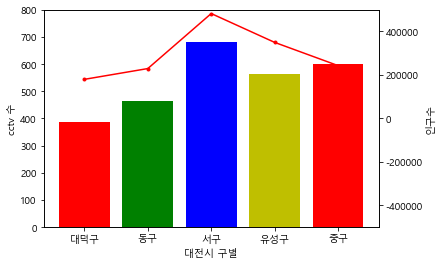

In [165]:

x = ['대덕구','동구','서구','유성구','중구']
y1_value = [388,466,680,564,599]
plt.xlabel('대전시 구별')
plt.ylabel('cctv 수')
plt.ylim(0,800,100)
plt.bar(x,y1_value, color = ['r','g','b','y'])   #바그래프생성!

plt.twinx()  #꺽은선 그래프를 함께 그리는것 
#인구수 꺽은선 그래프 
y2_value = (179829,229401,482384,349792,242992)
x = ['대덕구','동구','서구','유성구','중구']
plt.plot(x, y2_value, 'r.-')
plt.ylabel('인구수')
plt.ylim(-500000,500000,100000)  #y2축의 범위

plt.show()

In [68]:
df_criminal = df_criminal.groupby(['구분','발생건수'])
new_criminal = df_criminal.agg([np.sum])
new_criminal

죄종
              sum
구분  발생건수         
대덕구 2          살인
    5          강도
    66    강간,강제추행
    769        절도
    1032       폭행
동구  4          강도
    7          살인
    121   강간,강제추행
    1288       절도
    1643       폭행
서구  3          살인
    11         강도
    249   강간,강제추행
    1939       절도
    2800       폭행
유성구 2          강도
    5          살인
    119   강간,강제추행
    1073       절도
    1273       폭행
중구  5          살인
    20         강도
    144   강간,강제추행
    1145       절도
    2051       폭력

# 구별 범죄 발생건수

In [254]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import platform

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

In [255]:
df = pd.read_csv('대전광역시지방경찰청_자치구별 5대범죄 발생 현황(2017).csv',encoding='CP949')
DaejeonGu_name ={'대덕구': '대덕서', '동구': '동구서', '서구': '서구서', '유성구': '유성서',
                '중구': '중구서'}

df['경찰서별'] = df['구분'].apply(lambda v: DaejeonGu_name.get(v, v))
df

,구분,죄종,발생건수,경찰서별
0,중구,살인,5,중구서
1,중구,강도,20,중구서
2,중구,"강간,강제추행",144,중구서
3,중구,절도,1145,중구서
4,중구,폭력,2051,중구서
5,동구,살인,7,동구서
6,동구,강도,4,동구서
7,동구,"강간,강제추행",121,동구서
8,동구,절도,1288,동구서
9,동구,폭행,1643,동구서


In [256]:
# guDF = pd.pivot_table(df, index='구분', aggfunc=np.sum)
# guDF.head()
popDF = pd.read_csv('2019년 6월말 인구및 세대현황.csv', encoding='UTF-8')
m = pd.merge(popDF,df, how = 'outer', on = '구분')
m
m1 = m.groupby(['구분']).sum()
m1.index
m1.values.reshape(m1.values.shape[0])

array([1874, 3063, 5002, 2472, 3365], dtype=int64)

In [257]:
data_1 = pd.pivot_table(m,columns=['죄종'], aggfunc = np.sum,index = '구분')
data_1.fillna(0)

발생건수                                   
죄종  강간,강제추행    강도   살인      절도      폭력      폭행
구분                                            
대덕구    66.0   5.0  2.0   769.0     0.0  1032.0
동구    121.0   4.0  7.0  1288.0     0.0  1643.0
서구    249.0  11.0  3.0  1939.0     0.0  2800.0
유성구   119.0   2.0  5.0  1073.0     0.0  1273.0
중구    144.0  20.0  5.0  1145.0  2051.0     0.0

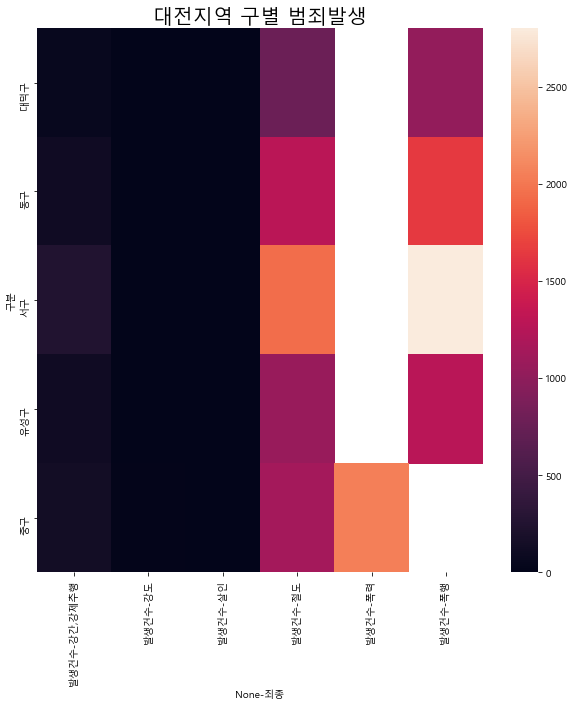

In [258]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(data_1)
plt.title('대전지역 구별 범죄발생',fontsize = 20)
plt.show()

In [271]:
import json
geo_path = 'C:/Users/CPB06GameN/Desktop/Daejeon_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [279]:
map = folium.Map(location=[36.340722, 127.390451], zoom_start=10)

map.choropleth(geo_data = geo_str,
               data = m1['발생건수'],
               columns = [m1.index, m1.values],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map


In [188]:
import folium

In [209]:
df_cctv1 = pd.read_csv('대전광역시_대덕구_CCTV_20190331.csv',encoding='CP949')

list_wd =list( df_cctv1['위도'].values) 
list_gd=list( df_cctv1['경도'].values)

map_1 = folium.Map(location = [36.351781, 127.423237], zoom_start = 12)       
for x,y in zip (list_wd,list_gd):
    folium.Marker([x,y], popup = '대덕구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
map_1


# for x in range(len(df_cctv1)):
#     folium.Marker([x,y], popup = '대덕구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
#     folium.Marker([ df_cctv1['위도'][x], df_cctv1['경도'][x]], popup = df_cctv1['소재지도로명주소'][x], icon = folium.Icon(icon = 'cloud')).add_to(map_1)
    
## map_1

In [229]:
#대덕구
df_cctv1 = pd.read_csv('대전광역시_대덕구_CCTV_20190331.csv',encoding='CP949')
list_wd1 =list( df_cctv1['위도'].values) 
list_gd1=list( df_cctv1['경도'].values)

#중구
df_cctv2 = pd.read_csv('대전광역시_중구_CCTV_20190527.csv',encoding='CP949')
list_wd2 =list( df_cctv2['위도'].values) 
list_gd2=list( df_cctv2['경도'].values)

#유성구
df_cctv3 = pd.read_csv('대전광역시_유성구_CCTV_20190520.csv',encoding='CP949')
list_wd3 =list( df_cctv3['위도'].values) 
list_gd3=list( df_cctv3['경도'].values)

#서구
df_cctv4 = pd.read_csv('대전광역시_대덕구_CCTV_20190331.csv',encoding='CP949')
list_wd4=list( df_cctv4['위도'].values) 
list_gd4=list( df_cctv4['경도'].values)

#동구
df_cctv5 = pd.read_csv('대전광역시_동구_CCTV_20190321.csv',encoding='CP949')
list_wd5 =list( df_cctv5['위도'].values) 
list_gd5 =list( df_cctv5['경도'].values)

map_1 = folium.Map(location = [36.351781, 127.423237], zoom_start = 12)   

a = int(input('1.대덕구,2.중구,3.유성구,4.서구,5.동구:'))

if a == 1: 
    for x,y in zip(list_wd1,list_gd1):
        folium.Marker([x,y], popup = '서구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
elif a == 2:       
    for x,y in zip(list_wd2,list_gd2):
        folium.Marker([x,y], popup = '중구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
elif a == 3:
    for x,y in zip(list_wd3,list_gd3):
        folium.Marker([x,y], popup = '유성구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
elif a == 4:
    for x,y in zip(list_wd4,list_gd4):
        folium.Marker([x,y], popup = '대덕구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)
elif a == 5:
    for x,y in zip(list_wd5,list_gd5):
        folium.Marker([x,y], popup = '동구cctv:742  crminal:1831', icon = folium.Icon(icon = 'cloud')).add_to(map_1)

map_1
        

1.대덕구,2.중구,3.유성구,4.서구,5.동구:4
